# Two Gaussian curve alignment

This notebook showcases how `msalign` performs when dealing with multiple curves in the signal. 
The algorithm performs pretty well when aliging *clean* and *noisy* data, especially when the 
ratio of the two curves is the same (or very similar)

The algoritm is a little less capable when dealing with two curves and the alignment is performed 
towards the smaller curve.

In [1]:
import numpy as np
from scipy import signal
from scipy.ndimage import shift
import matplotlib.pyplot as plt
from msalign import Aligner
from msalign.utilities import find_nearest_index

plt.style.use('ggplot')

# Utility functions
First, let's make a couple of functions that will generate data for us, as well as, show the results

In [2]:
def overlay_plot(ax, x, array, peak):
    """Generate overlay plot, showing each signal and the alignment peak(s)"""
    for i, y in enumerate(array):
        y = (y / y.max()) + (i * 0.2)
        ax.plot(x, y, lw=3)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xlabel("Index", fontsize=18)
    ax.set_xlim((x[0], x[-1]))
    ax.vlines(peak, *ax.get_ylim())
    
def plot_peak(ax, x, y, peak, window=100):
    peak_idx = find_nearest_index(x, peak)
    _x = x[peak_idx-window:peak_idx+window]
    _y = y[peak_idx-window:peak_idx+window]
    ax.plot(_x, _y)
    
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xlim((_x[0], _x[-1]))
    ax.vlines(peak, *ax.get_ylim())

def zoom_plot(axs, x, array, aligned_array, peaks):
    for i, y in enumerate(array):
        for j, peak in enumerate(peaks):
            plot_peak(axs[0, j], x, y, peak)
            
    for i, y in enumerate(aligned_array):
        for j, peak in enumerate(peaks):
            plot_peak(axs[1, j], x, y, peak)

# Alignment of the mass spectrometry example

Here is the example used in the MATLAB documentation. Here, the dataset contains 8 signals that differ
from each other a little. The alignment is performed by using 4 individual peaks that are common (or mostly common)
between the signals

In first instance, we simply align the signals (without rescaling `only_shift=True`). As you can see, the alignment did relatively good job of shifting each signal near its correct position, but 2/3 of the signals could be slightly improved.

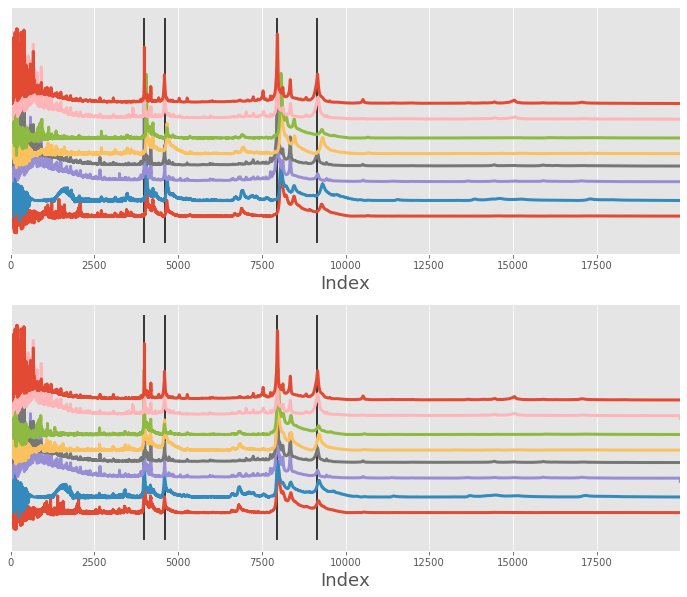

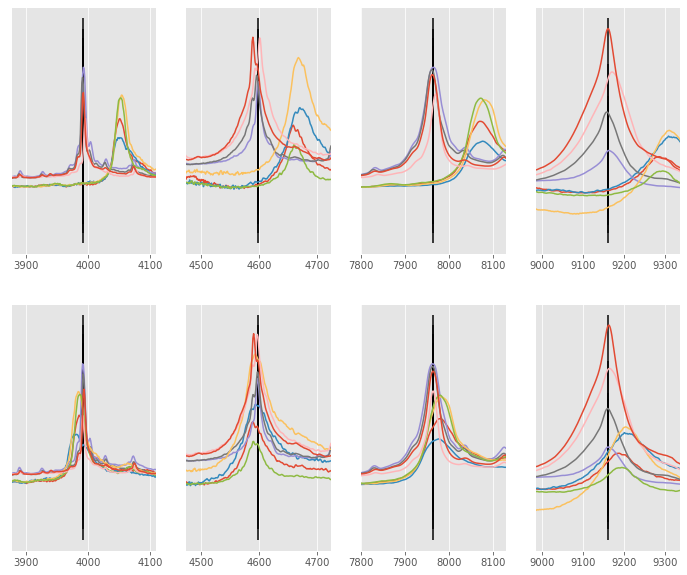

In [3]:
# load data
filename = r"D:\GitHub\msalign\example_data\msalign_test_data.csv"

data = np.genfromtxt(filename, delimiter=",")
x = data[1:, 0]
array = data[1:, 1:].T
peaks = [3991.4, 4598, 7964, 9160]
weights = [60, 100, 60, 100]

# instantiate aligner object
aligner = Aligner(
    x, 
    array, 
    peaks, 
    weights=weights,
    return_shifts=True,
    align_by_index=True,
    only_shift=True,
    method="pchip",
)
aligner.run()
aligned_array, shifts_out = aligner.align()

# display before and after shifting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
overlay_plot(ax[0], x, array, peaks)
overlay_plot(ax[1], x, aligned_array, peaks)

# zoom-in on each peak
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
zoom_plot(ax, x, array, aligned_array, peaks)

# Alignment improvement

We can improve the alignment performance by switching the `only_shift` keyword parameter to `True`. This will 
ensure that each signal is shifted and rescaled which in practice means the `x` array is slightly altered on each iteration.

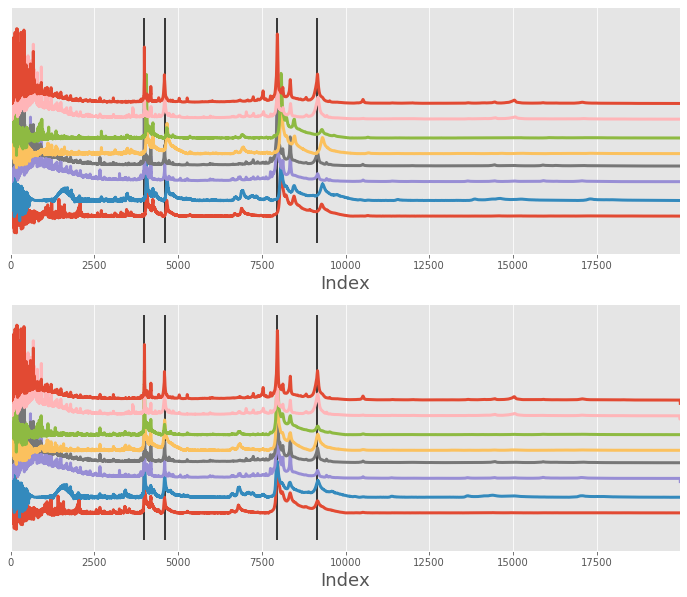

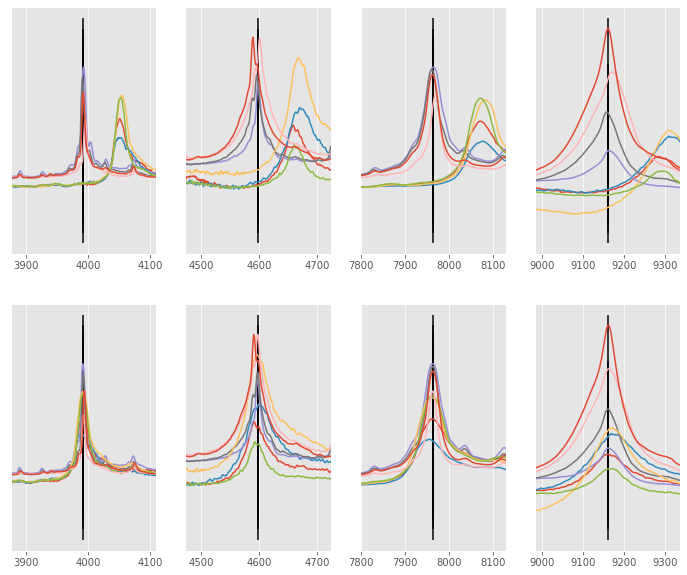

In [4]:
# instantiate aligner object
aligner = Aligner(
    x, 
    array, 
    peaks, 
    weights=weights,
    return_shifts=True,
    align_by_index=True,
    only_shift=False,
    method="pchip",
)
aligner.run()
aligned_array, shifts_out = aligner.align()

# display before and after shifting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
overlay_plot(ax[0], x, array, peaks)
overlay_plot(ax[1], x, aligned_array, peaks)

# zoom-in on each peak
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
zoom_plot(ax, x, array, aligned_array, peaks)
